# Data Science and Business Analytics Intern 

# Author : Himani Sharma

In [82]:
#importing libraries
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline

In [83]:
#read data
df = pd.read_csv('SampleSuperstore.csv')

## Data Visualization

In [84]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Number of rows and columns

In [85]:
##Number of rows and columns in data set

print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  9994
Number of columns in dataset is:  13


Information about datatypes

In [122]:
#Get information about datatypes of the columns and number of non zero rows in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


As we can see from data above, there are no missing values.

Descriptive statistics of quantitative variables.

In [88]:
#Descriptive statistics of quantitative variables. To see if there exist any not possible values.

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [89]:
data = df[:]
print("Number of duplicated transactions:", len(data[data.duplicated()]))

#Since Duplicate Transactions are very low and orderID and date-time are not given, So we are not deleting the duplicate data

Number of duplicated transactions: 17


Dataframes for plots

In [90]:
plot = pd.DataFrame(data.groupby(['Ship Mode'])['Profit'].sum()).reset_index()
plot2 = pd.DataFrame(data.groupby(['Segment'])['Profit'].sum()).reset_index()
plot3 = pd.DataFrame(data.groupby(['Country'])['Profit'].sum()).reset_index()
plot4 = pd.DataFrame(data.groupby(['Category'])['Profit'].sum()).reset_index()
plot5 = pd.DataFrame(data.groupby(['Discount'])['Profit'].sum()).reset_index()

# Which Ship mode brings the Highest Profit?

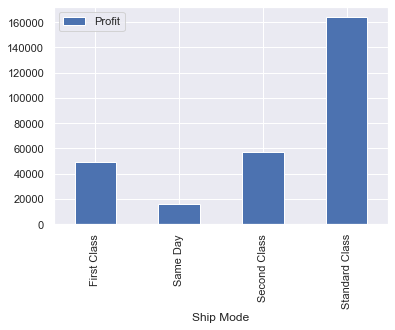

In [91]:
ax=plot.plot(kind='bar',x="Ship Mode",y="Profit")

# Which Segment brings the highest Profit?

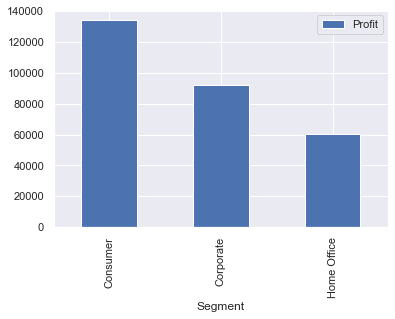

In [92]:
ax=plot2.plot(kind='bar',x="Segment",y="Profit")

# Which Country brings the highest Profit?

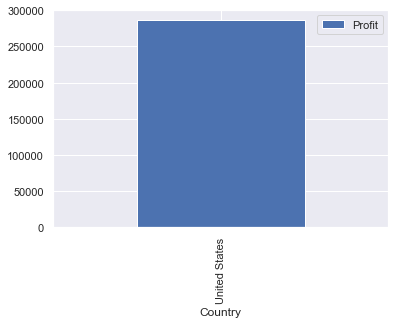

In [93]:
ax=plot3.plot(kind='bar',x="Country",y="Profit")

# Which Category brings the highest Profit?

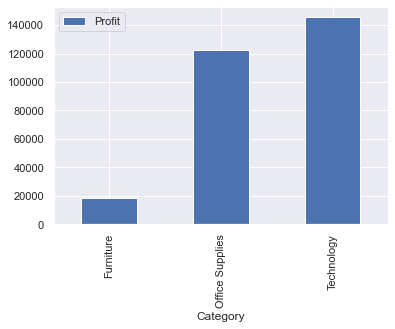

In [94]:
ax=plot4.plot(kind='bar',x="Category",y="Profit")

# Profit Analysis

In [95]:
pd.DataFrame(data['Profit'].describe())

,Profit
count,9994.000000
mean,28.656896
std,234.260108
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


# Profit distribution Graph

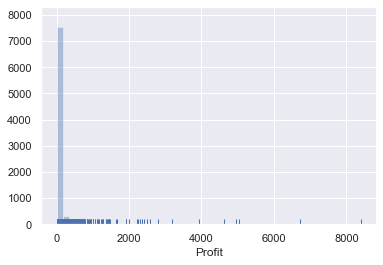

In [128]:
ax=sns.distplot(data[data['Profit']>0]['Profit'], kde=False, rug=True)

# Top 10 Cities with Max Profit

In [120]:
customer_city=data[['City','Profit']]
plot5=pd.DataFrame(customer_city.groupby(['City'])['Profit'].aggregate('sum').reset_index().sort_values('Profit', ascending=False)).reset_index()
plot5.head(10)

,index,City,Profit
0,329,New York City,62036.9837
1,266,Los Angeles,30440.7579
2,452,Seattle,29156.0967
3,438,San Francisco,17507.3854
4,123,Detroit,13181.7908
5,233,Lafayette,10018.3876
6,215,Jackson,7581.6828
7,21,Atlanta,6993.6629
8,300,Minneapolis,6824.5846
9,437,San Diego,6377.1960


# Bottommost 10 cities with lowest Profit

In [124]:
plot5.tail(10)

,index,City,Profit
521,216,Jacksonville,-2323.8350
522,24,Aurora,-2691.7386
523,375,Phoenix,-2790.8832
524,109,Dallas,-2846.5257
525,60,Burlington,-3622.8772
526,80,Chicago,-6654.5688
527,241,Lancaster,-7239.0684
528,434,San Antonio,-7299.0502
529,207,Houston,-10153.5485
530,374,Philadelphia,-13837.7674
